In [9]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat_V = sio.loadmat('attfaces.mat')

In [50]:
print "The shape of the V is %r*%r" %(mat_V['V'].shape[0], mat_V['V'].shape[1])

The shape of the V is 10304*400


In [33]:
height = 112
width = 92
numVisualize = 400
def visualize(V, height, width, numVisualize):
    """ visualize the columns of the image data
    
    Args:
        height: Integer, the height of each image, height*width=V.shape[0]
        width: Integer, the width of each image, height*width=V.shape[0]
        numVisualize: Integer, the number of images
    Returns:
        V_visual: matrix that could be shown in the function plt.imshow()
    """
    sqrt_numV = int(np.sqrt(numVisualize))
    V_visual = np.zeros((height*sqrt_numV,width*sqrt_numV))
    ix =0
    ix1 = 0
    for i in range(sqrt_numV):
        ix2 = 0
        for j in range(sqrt_numV):
            curV = V[:, ix]
            curV = np.reshape(curV, (width, height)).T
            V_visual[ix1:(ix1+height), ix2:(ix2+width)] = curV
            ix2 = ix2 + width
            ix = ix+1
        ix1 = ix1 + height
    return V_visual

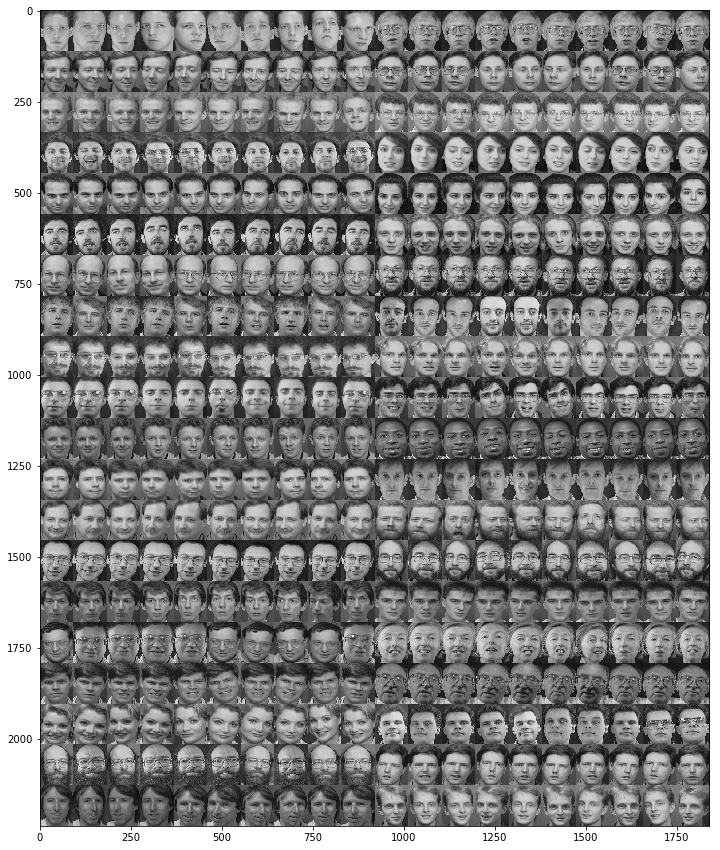

In [26]:
V = mat_V['V']
V_vis = visual(V,112,92,400)
plt.figure(figsize=(18,15))
plt.imshow(V_vis, cmap='gray')
plt.show()

## 1. EM Algorithm

In [29]:
def EM_NMF(V, aw, ah, bw, bh, k, iter):
    """EM algorithm for Non-negative matrix factorization(NMF)
    
    Args:
        V: data matrix(f*n)
        aw, ah, bw, hh: float, parameters for the Gamma distributionof W, H
        k: Interger, the number of eigenvectors
        iter: Integer, the number of iterations
    Returns:
        W,H: the final result of iteration for W, H
    """
    f,n = V.shape
    np.random.seed(42)
    W = np.random.randint(1, 255, size=(f, k))
    H = np.random.randint(1, 2, size=(k, n))
    for t in range(iter):
        W_n = (W*((V*1./W.dot(H)).dot(H.T)) + aw - 1)/(1./bw + np.ones((f, n)).dot(H.T))
        H_n = (H*(W.T.dot(V*1./W.dot(H))) + ah - 1)/(1./bh+ W.T.dot(np.ones((f, n))))
        W = W_n
        H = H_n
    return W,H

## 2. Try different values for $\beta_w$ and $\beta_h$. 

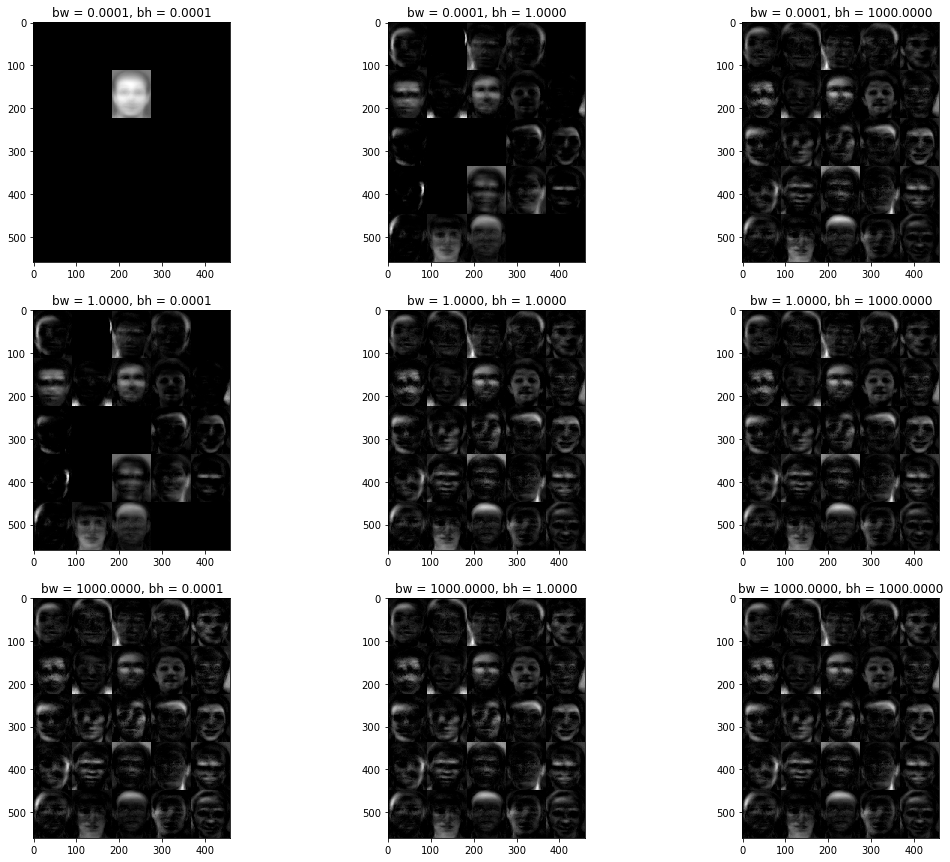

In [51]:
Bw = [0.0001, 1, 1000]
Bh = [0.0001, 1, 1000]
plt.figure(figsize=(18, 15))
k = 1
for bw in Bw:
    for bh in Bh:
        W = EM_NMF(V, 1, 1, bw, bh, 25, 300)[0]
        W_vis = visualize(W, 112, 92, 25)
        plt.subplot(3, 3, k)
        plt.title("bw = %.4f, bh = %.4f" %(bw, bh))
        plt.imshow(W_vis, cmap='gray')
        k += 1
plt.show()

## 3. Try different values for $\alpha_w$ and $\alpha_h$

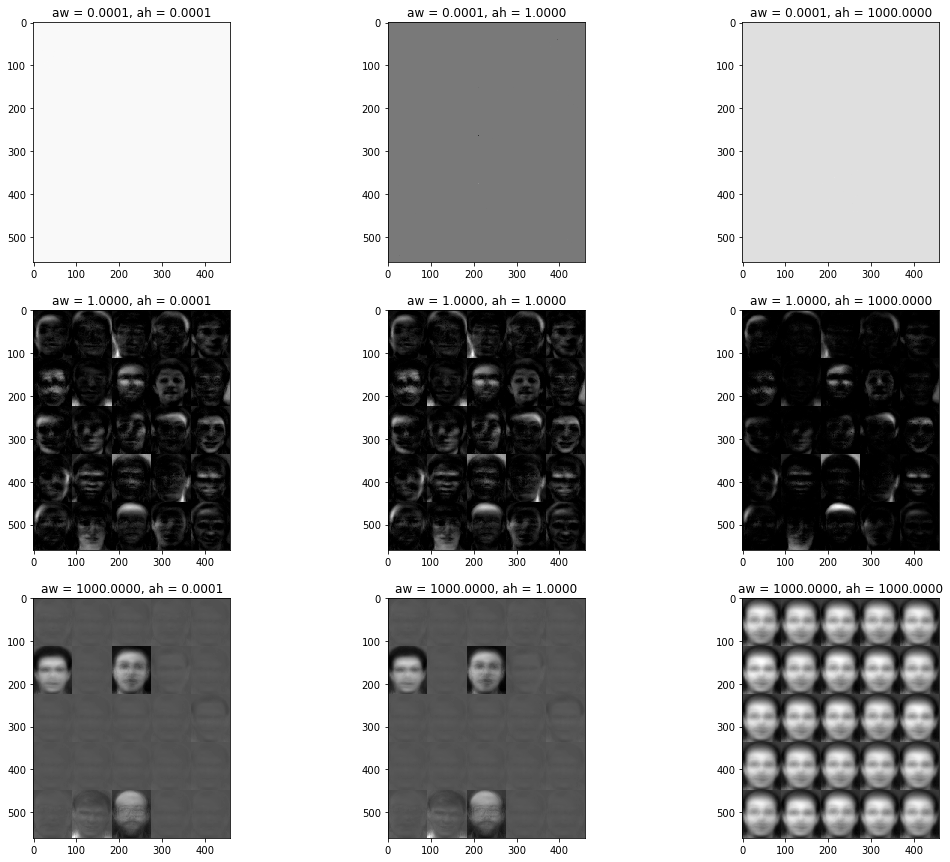

In [52]:
Aw = [0.0001, 1, 1000]
Ah = [0.0001, 1, 1000]
plt.figure(figsize=(18, 15))
k = 1
for aw in Aw:
    for ah in Ah:
        W = EM_NMF(V, aw, ah, 1, 1, 25, 300)[0]
        W_vis = visualize(W, 112, 92, 25)
        plt.subplot(3, 3, k)
        plt.title("aw = %.4f, ah = %.4f"%(aw, ah))
        plt.imshow(W_vis, cmap='gray')
        k += 1
plt.show()